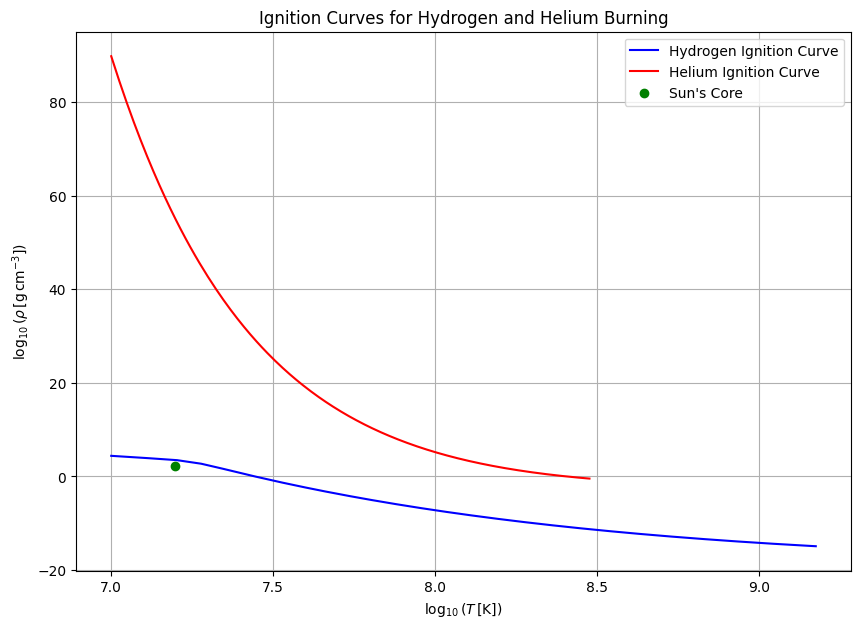

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
q_min = 1e3  # erg g^-1 s^-1
X = 0.7  # Hydrogen mass fraction for solar composition
Z = 0.02  # Metallicity for solar composition
Y = 1.0  # Helium mass fraction for helium ignition

# Define temperature ranges (in Kelvin)
T9_H = np.linspace(0.01, 1.5, 500)  # T9 for H burning, T9 ≡ T/(10^9K)
T8_He = np.linspace(0.1, 3.0, 500)  # T8 for He burning, T8 ≡ T/(10^8K)

# Define q_pp and q_CNO for H burning
def q_pp(T9, rho):
    return (2.4e4 * rho * X**2) / T9**(2/3) * np.exp(-3.38 / T9**(1/3))

def q_CNO(T9, rho):
    return (4.4e25 * rho * X * Z) / T9**(2/3) * np.exp(-15.228 / T9**(1/3))

# Define combined H burning energy generation and solve for rho(T9) such that q_pp + q_CNO = q_min
rho_H = q_min / (q_pp(T9_H, 1) + q_CNO(T9_H, 1))

# Define q_3alpha for He burning and solve for rho(T8) such that q_3alpha = q_min
def q_3alpha(T8, rho):
    return 5.09e11 * rho**2 * Y**3 * T8**(-3) * np.exp(-44.027 / T8)

rho_He = (q_min / (5.09e11 * Y**3 * T8_He**(-3) * np.exp(-44.027 / T8_He)))**(1/2)

# Log values for plotting
log10_rho_H = np.log10(rho_H)
log10_rho_He = np.log10(rho_He)
log10_T_H = np.log10(T9_H * 1e9)
log10_T_He = np.log10(T8_He * 1e8)

# Plotting
plt.figure(figsize=(10, 7))
plt.plot(log10_T_H, log10_rho_H, label="Hydrogen Ignition Curve", color="blue")
plt.plot(log10_T_He, log10_rho_He, label="Helium Ignition Curve", color="red")

# Adding Sun's core conditions (~T = 1.57e7 K, ρ = 150 g/cm^3)
plt.scatter(np.log10(1.57e7), np.log10(150), color="green", marker="o", label="Sun's Core")

# Labels and legend
plt.xlabel(r"$\log_{10}(T \, \mathrm{[K]})$")
plt.ylabel(r"$\log_{10}(\rho \, \mathrm{[g \, cm^{-3}]})$")
plt.title("Ignition Curves for Hydrogen and Helium Burning")
plt.legend()
plt.grid(True)
plt.show()
